In [4]:
# !pip install pytesseract
# !pip install opencv-python
# !pip install PIL
# !pip install tensorflow
# !pip3 install matplotlib
# !pip3 install imutils

In [1]:
#To check which python version is being used
import sys
print(sys.version)

3.11.5 (main, Aug 24 2023, 15:09:45) [Clang 14.0.3 (clang-1403.0.22.14.1)]


In [23]:
import numpy
from matplotlib import pyplot as plt
import cv2
import pytesseract
from imutils.object_detection import non_max_suppression
import os
from PIL import Image
%matplotlib inline

os.chdir("/Users/krishanusaha/Desktop/T&S/OCR/")
pytesseract.pytesseract.tesseract_cmd=r'/opt/homebrew/bin/tesseract'

In [17]:
img = cv2.imread("Sample KTPs/1622826876_ktp-weldi-watermark.jpg")

In [28]:
#Image Pre-processing
#img = cv2.resize(img, (400, 400))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

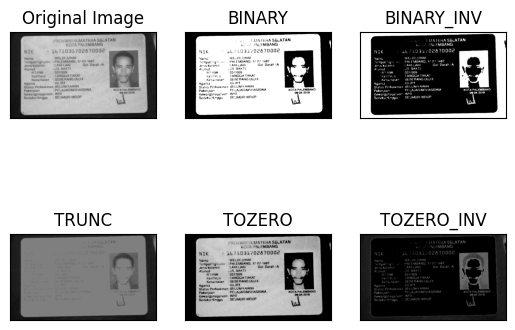

In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("Sample KTPs/1622826876_ktp-weldi-watermark.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

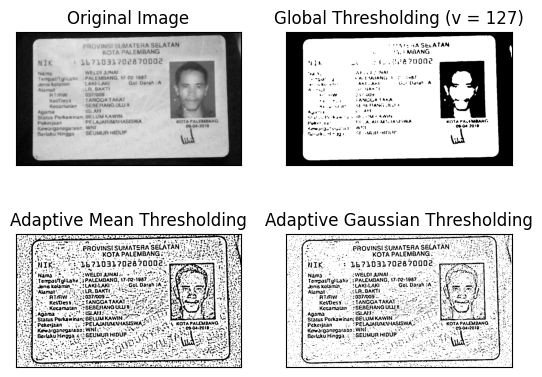

In [44]:
import cv2 as cv
import numpy as np
img = cv.imread("Sample KTPs/1622826876_ktp-weldi-watermark.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

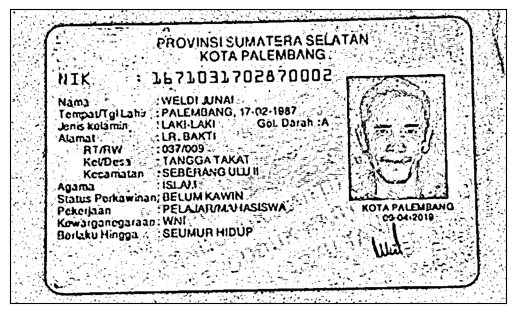

In [26]:
plt.imshow(th3, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [22]:
text = pytesseract.image_to_string(th3)
print(text)

PROVINSL SUMATERA SELATAN
i. -KOTA PALEMBANG

Nama OC WELDIUNADS oS
TempavTgitani : "EPALEMOANG, 17-02-1887:

KELAKI Gol Dar

Agama
F “Status Porkawinan; DELUM KA

~. Peketan ted PELAIAR
Kow3igancegaraan: WNT.”
2] Soraku Mingga « EUMUR HIDUP




In [125]:
im = "Sample KTPs/1622826876_ktp-weldi-watermark.jpg"
image = cv2.imread(im)
preprocessed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# preprocessed_image_th = cv2.threshold(preprocessed_image, 0,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

preprocessed_image_th = cv2.adaptiveThreshold(preprocessed_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

In [126]:
preprocessed_image_med_blur = cv2.medianBlur(preprocessed_image_th, 3)

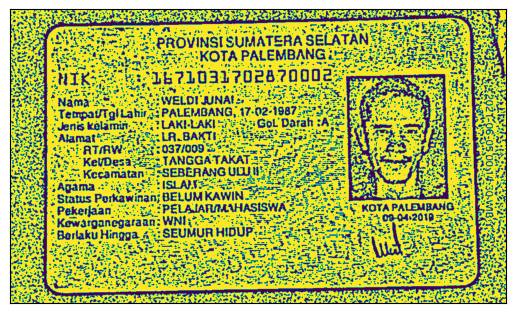

In [127]:
plt.imshow(preprocessed_image_med_blur)
plt.xticks([]),plt.yticks([])
plt.show()

In [128]:
text = pytesseract.image_to_string(preprocessed_image_med_blur)
print(text)

vu.

ns Tretia eee
ISUMATERA SELATAN =

es,
; Status Porkawin

* Pekerfaan: 2." A

> Kewarganegaraa WNT

* Berlaku Hingga 4%: SEUMUR HID)
ne ES ~

KOTA PALEMBAN
09-04:2019 2°


